In [2]:
import pandas as pd             #import pandas library

### Load the train and test datasets

In [3]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv")

## Exploratory data analysis
### Inspect couple of rows of train and test dataframe

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Dictionary

- Survived: 0 = No, 1 = Yes
- Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- SibSp: Number of Siblings / Spouses aboard the Titanic
- Parch: Number of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Let's summarize the features of the train and test dataframes

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Dimensions of train and test dataframe
##### Training set has 891 observations/rows and 12 variables/columns

In [8]:
train.shape                

(891, 12)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see Age value, Cabin value and Embarked values are missing for many rows.

There are 177 rows with missing Age, 687 rows with missing Cabin and 2 rows with missing Embarked information.

##### Test dataset has 418 observations/rows and 11 variables/columns.
##### Survived column is missing from test dataset because that's what we will predict.

In [10]:
test.shape                 

(418, 11)

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Here, 549 people died and only 342 people survived. 

After normalizing we get 62% people died and 38% people survived.

In [13]:
train["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### To dig in a little deeper, we can see gender plays an important role

In [14]:
# Females that survived Vs females that passed away

train["Survived"][train["Sex"] == 'female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [15]:
# Males that survived Vs males that passed away

train["Survived"][train["Sex"] == 'male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [16]:
# Normalized female survival

train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [17]:
# Normalized male survival

train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

### Age is another feature that will influence the survival

##### Children were likely to be saved first 

In [18]:
train["Child"] = float('NaN')  #create a new column i.e. child

##### Assign 1 to passengers under 18, 0 to those 18 or older

In [19]:
train["Child"][train["Age"] < 18] = 1

C:\Users\hp\OneDrive\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
train["Child"][train["Age"] >= 18] = 0

C:\Users\hp\OneDrive\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Normalized survival rates for those who are less than 18 and for those who are older 
##### As you can see from the survival proportions, age does certainly seem to play a role.

In [21]:
train["Survived"][train["Child"] == 1].value_counts(normalize = True)

1    0.539823
0    0.460177
Name: Survived, dtype: float64

In [22]:
train["Survived"][train["Child"] == 0].value_counts(normalize = True)

0    0.618968
1    0.381032
Name: Survived, dtype: float64

### Import libraries for visualization

In [72]:
import matplotlib.pyplot as plt

### Bar chart for Categorical features
- Pclass
- Sex
- SibSp 
- Parch 
- Embarked

In [66]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(12, 6))

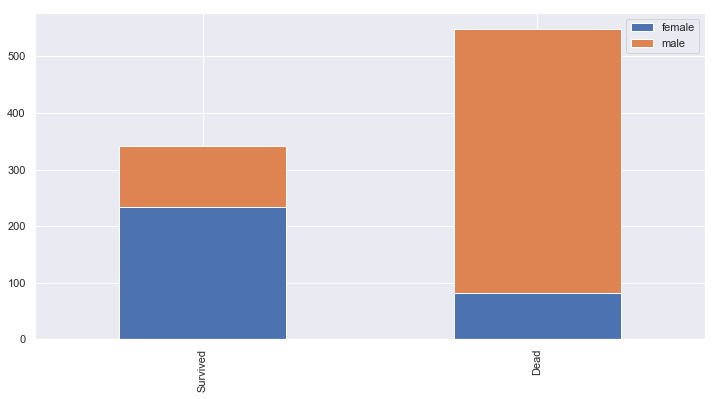

In [67]:
bar_chart('Sex')

#### It is confirmed from the above chart shows that Women are more likely to survive than Men

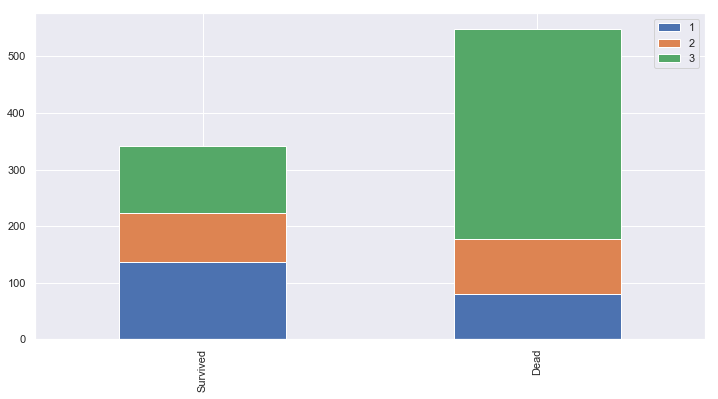

In [68]:
bar_chart('Pclass')

#### Following are the points that can be concluded from the above chart:
- Survival rate of 1st class is more than other classes
- 3rd class more likely to dead than other classes

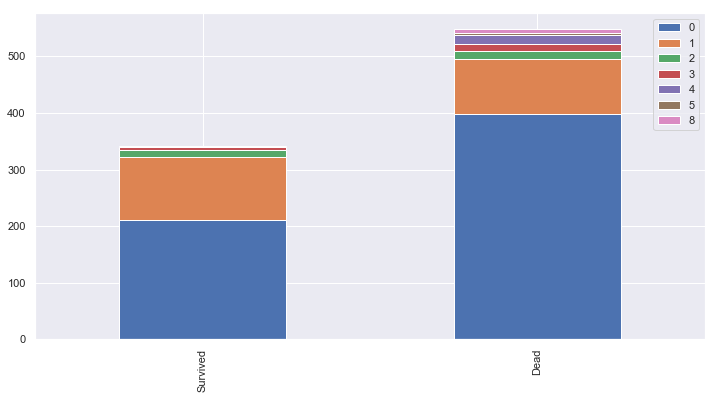

In [69]:
bar_chart('SibSp')              # Number of siblings / spouses aboard the Titanic

#### Following are the points that can be concluded from the above chart:
- A person aboarded with more than 2 siblings or spouse more likely survived
- A person aboarded without siblings or spouse more likely dead

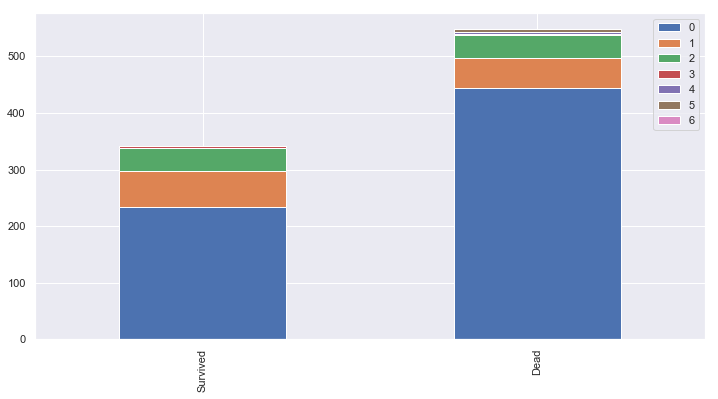

In [70]:
bar_chart('Parch')               # Number of parents / children aboard the Titanic

#### Following are the points that can be concluded from the above chart:
- A person aboarded with more than 2 parents or children more likely survived
- A person aboarded alone more likely dead

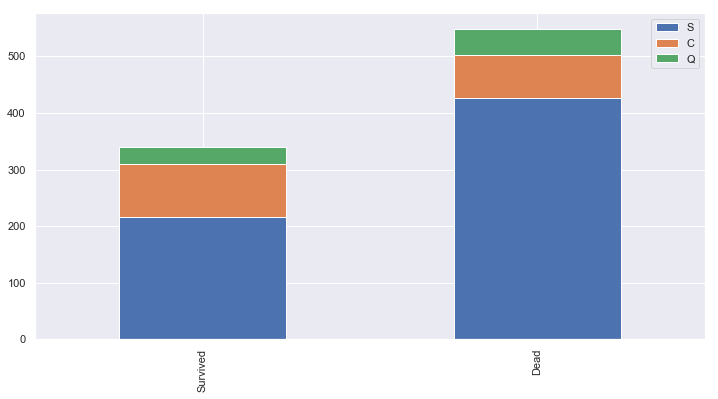

In [71]:
bar_chart('Embarked')

#### Following are the point that can be concluded from the above chart:
- A person aboarded from C slightly more likely survived
- A person aboarded from Q more likely dead
- A person aboarded from S more likely dead